In [1]:
# Code to create combined boxplots for CMIP6 ensemble + observational data
# Author: Nathan Erickson
# Date: 6/6/2022
# Coded with Python 3.8.10

In [2]:
# Module importing; directory management

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = '/home/nathane1/Thesis/output'
if not os.getcwd().endswith('output'):
    os.chdir(path)
print(os.getcwd())

/home/nathane1/Thesis/output


In [4]:
# Read in data, do some partitioning

data = pd.read_csv('djf_model_averages.csv', index_col = 'Unnamed: 0')
ERSST = pd.read_csv('djf_ERSSTv5.csv', index_col='Unnamed: 0')
ERSST.index = ERSST.index.rename('Datetimes')

# This needs to be generalized
eli_nino_models = data[1:].loc[[(np.mean(data.T[model].values.astype(float)) > 165) for model in data.index[1:]]]
eli_neutral_models = data[1:].loc[[(np.mean(data.T[model].values.astype(float)) > 160) & (np.mean(data.T[model].values.astype(float)) < 165) for model in data.index[1:]]]
eli_nina_models = data[1:].loc[[(np.mean(data.T[model].values.astype(float)) < 160) for model in data.index[1:]]]

# Uncomment these lines for historical comparisons with ERSST data

eli_nino_models = pd.concat([eli_nino_models,ERSST.T])
eli_nina_models = pd.concat([eli_nina_models,ERSST.T])

In [5]:
real_test = pd.concat([data.T.iloc[:50], data.T.iloc[-50:]])

nina_list = ['FGOALS-g3', 'IPSL-CM6A-LR', 'TaiESM1','Time Period']
nino_list = ['CNRM-ESM2-1', 'CNRM-CM6-1', 'GISS-E2-1-G', 'MIROC-ES2L', 'FGOALS-f3-L', 'NESM3', 'CNRM-CM6-1-HR', 'NorESM2-LM', 'ACCESS-ESM1-5',
             'INM-CM4-8', 'CanESM5', 'EC-Earth3-Veg', 'HadGEM3-GC31-LL', 'INM-CM5-0', 'EC-Earth3', 'MPI-ESM1-2-HR', 'MIROC6', 'HadGEM3-GC31-MM',
            'Time Period']
neutral_list = ['AWI-CM-1-1-MR', 'ACCESS-CM2', 'CAMS-CSM1-0', 'CMCC-CM2-SR5', 'NorESM2-MM', 'GFDL-CM4', 'BCC-CSM2-MR', 'GFDL-ESM4', 'Time Period']

[Text(0, 0, 'TaiESM1'),
 Text(1, 0, 'NorESM2-MM'),
 Text(2, 0, 'NorESM2-LM'),
 Text(3, 0, 'NESM3'),
 Text(4, 0, 'MPI-ESM1-2-HR'),
 Text(5, 0, 'MIROC-ES2L'),
 Text(6, 0, 'MIROC6'),
 Text(7, 0, 'IPSL-CM6A-LR'),
 Text(8, 0, 'INM-CM5-0'),
 Text(9, 0, 'INM-CM4-8'),
 Text(10, 0, 'HadGEM3-GC31-MM'),
 Text(11, 0, 'HadGEM3-GC31-LL'),
 Text(12, 0, 'GISS-E2-1-G'),
 Text(13, 0, 'GFDL-ESM4'),
 Text(14, 0, 'GFDL-CM4'),
 Text(15, 0, 'FGOALS-g3'),
 Text(16, 0, 'FGOALS-f3-L'),
 Text(17, 0, 'EC-Earth3-Veg'),
 Text(18, 0, 'EC-Earth3'),
 Text(19, 0, 'CNRM-ESM2-1'),
 Text(20, 0, 'CNRM-CM6-1-HR'),
 Text(21, 0, 'CNRM-CM6-1'),
 Text(22, 0, 'CMCC-CM2-SR5'),
 Text(23, 0, 'CanESM5'),
 Text(24, 0, 'CAMS-CSM1-0'),
 Text(25, 0, 'BCC-CSM2-MR'),
 Text(26, 0, 'AWI-CM-1-1-MR'),
 Text(27, 0, 'ACCESS-ESM1-5'),
 Text(28, 0, 'ACCESS-CM2')]

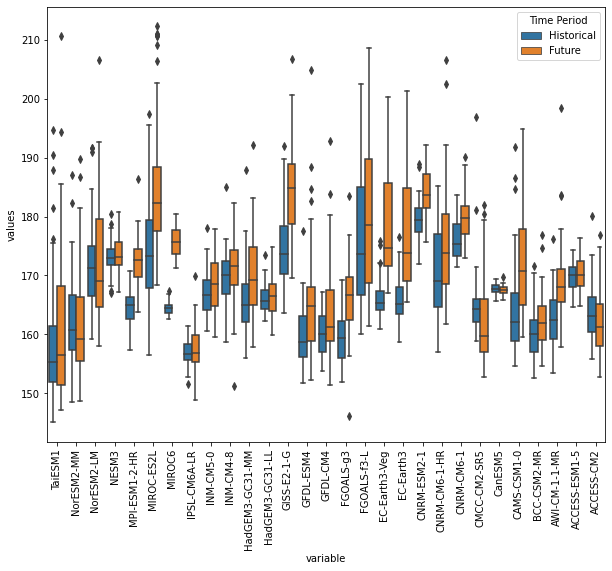

In [6]:
test = pd.melt(real_test, id_vars = 'Time Period')
test = test.explode('value')
test['values'] = test['value'].astype(float)

fig,ax = plt.subplots(1, figsize = (10,8))
comb_box = sns.boxplot(x = 'variable', y = 'values', hue = 'Time Period', data = test, ax = ax)
comb_box.set_xticklabels(comb_box.get_xticklabels(),rotation = 90)

In [7]:
nina_group = real_test[nina_list]
nino_group = real_test[nino_list]
neutral_group = real_test[neutral_list]

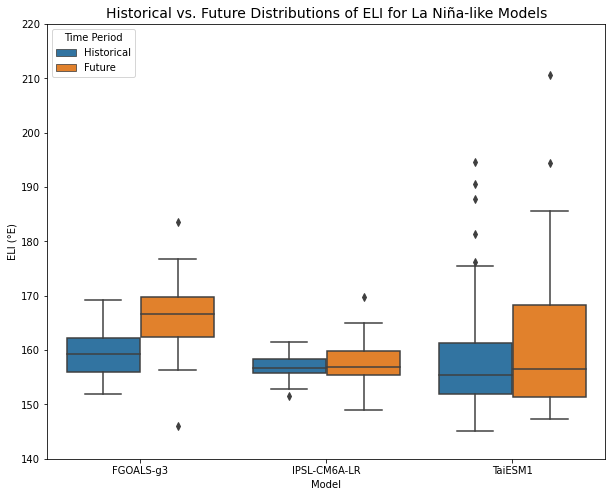

In [8]:
nina_test = pd.melt(nina_group, id_vars = 'Time Period', var_name = 'Model')
nina_test['ELI (°E)'] = nina_test['value'].astype(float)
nina_test.drop(columns = 'value')
fig,ax = plt.subplots(1, figsize = (10,8))

nina_box = sns.boxplot(x = 'Model', y = 'ELI (°E)', hue = 'Time Period', data = nina_test, ax = ax)
nina_box.set_ybound(140,220)
nina_box.set_title('Historical vs. Future Distributions of ELI for La Niña-like Models', size = 14, loc = 'center')
#nina_box.set_xticklabels(nina_box.get_xticklabels(),rotation = 90)

fig_dir = '/home/nathane1/Thesis/paper_images'
os.chdir(fig_dir)

nina_fig = nina_box.get_figure()
#nina_fig.savefig('nina_boxplot.jpg', bbox_inches = 'tight')

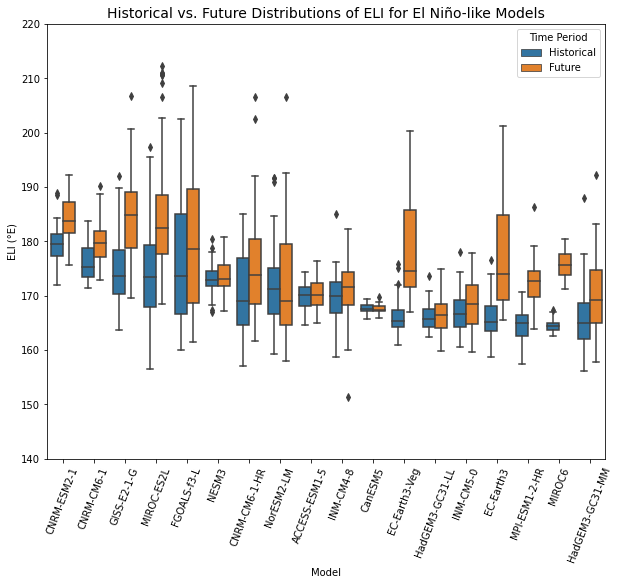

In [9]:
nino_test = pd.melt(nino_group, id_vars = 'Time Period', var_name = 'Model')
nino_test['ELI (°E)'] = nino_test['value'].astype(float)
nino_test.drop(columns = 'value')
fig,ax = plt.subplots(1, figsize = (10,8))

nino_box = sns.boxplot(x = 'Model', y = 'ELI (°E)', hue = 'Time Period', data = nino_test, ax = ax)
nino_box.set_ybound(140,220)
nino_box.set_title('Historical vs. Future Distributions of ELI for El Niño-like Models', size = 14, loc = 'center')
nino_box.set_xticklabels(nino_box.get_xticklabels(),rotation = 69)

fig_dir = '/home/nathane1/Thesis/paper_images'
os.chdir(fig_dir)

nino_fig = nino_box.get_figure()
#nino_fig.savefig('nino_boxplot.jpg', bbox_inches = 'tight')

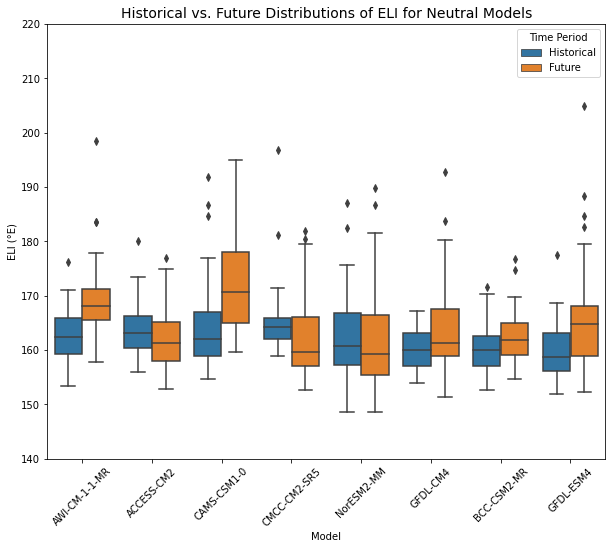

In [10]:
neutral_test = pd.melt(neutral_group, id_vars = 'Time Period', var_name = 'Model')
neutral_test['ELI (°E)'] = neutral_test['value'].astype(float)
neutral_test.drop(columns = 'value')
fig,ax = plt.subplots(1, figsize = (10,8))

neutral_box = sns.boxplot(x = 'Model', y = 'ELI (°E)', hue = 'Time Period', data = neutral_test, ax = ax)
neutral_box.set_ybound(140,220)
neutral_box.set_title('Historical vs. Future Distributions of ELI for Neutral Models', size = 14, loc = 'center')
neutral_box.set_xticklabels(neutral_box.get_xticklabels(),rotation = 45)

fig_dir = '/home/nathane1/Thesis/paper_images'
os.chdir(fig_dir)

neutral_fig = neutral_box.get_figure()
#neutral_fig.savefig('neutral_box.jpg', bbox_inches = 'tight')